<a href="https://colab.research.google.com/github/rajidisindhuja/sindhuja_INFO5731_Fall2023/blob/main/INFO5731_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
# Write your code here

import requests
from bs4 import BeautifulSoup
from nltk import ngrams, word_tokenize, pos_tag, download
from collections import Counter
import pandas as pd

# Download NLTK resources
download('punkt')
download('averaged_perceptron_tagger')

def fetch_reviews(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    reviews = []
    review_elements = soup.find_all('div', class_='text show-more__control')
    for review_element in review_elements:
        review_text = review_element.get_text(strip=True)
        reviews.append(review_text)

    return reviews

def extract_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

def calculate_ngram_frequencies(dataset, n):
    ngram_frequencies = Counter()

    for review in dataset:
        ngrams_list = extract_ngrams(review, n)
        ngram_frequencies.update(ngrams_list)

    return ngram_frequencies

def calculate_bigram_probabilities(dataset):
    bigram_counts = Counter()
    unigram_counts = Counter()

    for review in dataset:
        tokens = word_tokenize(review)
        bigrams = list(ngrams(tokens, 2))
        unigrams = list(ngrams(tokens, 1))

        bigram_counts.update(bigrams)
        unigram_counts.update(unigrams)

    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        unigram = bigram[0]

        # Check if the count of the unigram is zero to avoid division by zero
        if unigram_counts[unigram] != 0:
            probability = count / unigram_counts[unigram]
        else:
            probability = 0

        bigram_probabilities[bigram] = probability

    return bigram_probabilities

def calculate_relative_probabilities(dataset):
    noun_phrase_frequencies = Counter()

    for review in dataset:
        tokens = word_tokenize(review)
        tagged_tokens = pos_tag(tokens)

        # Extracting noun phrases
        noun_phrases = [word for word, pos in tagged_tokens if pos.startswith('NN')]

        noun_phrase_frequencies.update(noun_phrases)

    max_frequencies = noun_phrase_frequencies.most_common(1)[0][1]

    relative_probabilities = {}
    for review in dataset:
        tokens = word_tokenize(review)
        tagged_tokens = pos_tag(tokens)

        # Extracting noun phrases
        noun_phrases = [word for word, pos in tagged_tokens if pos.startswith('NN')]

        # Calculating relative probabilities
        relative_probabilities[review] = {noun: freq / max_frequencies for noun, freq in noun_phrase_frequencies.items()}

    return relative_probabilities

def display_results(ngram_frequencies, bigram_probabilities, relative_probabilities):
    print("N-gram Frequencies:")
    print(ngram_frequencies)

    print("\nBigram Probabilities:")
    print(bigram_probabilities)

    print("\nRelative Probabilities of Noun Phrases:")
    df = pd.DataFrame.from_dict(relative_probabilities, orient='index')
    print(df)

if __name__ == "__main__":
    url = "https://www.imdb.com/title/tt10640346/reviews?ref_=tt_urv"
    reviews = fetch_reviews(url)

    n = 3
    ngram_frequencies = calculate_ngram_frequencies(reviews, n)
    bigram_probabilities = calculate_bigram_probabilities(reviews)
    relative_probabilities = calculate_relative_probabilities(reviews)

    display_results(ngram_frequencies, bigram_probabilities, relative_probabilities)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


N-gram Frequencies:
Counter({". It 's": 15, "`` Babylon ''": 9, 'of the film': 8, '. It is': 8, 'some of the': 7, ', and the': 7, 'La La Land': 6, '. The film': 6, "I do n't": 6, "It 's a": 5, "Singin ' in": 5, "' in the": 5, 'in the Rain': 5, 'wants to be': 5, 'the film .': 5, 'Damien Chazelle is': 4, 'one of the': 4, '. This movie': 4, 'this movie .': 4, ". He 's": 4, 'at the same': 4, '. I do': 4, ', as well': 4, 'as well as': 4, ', `` Babylon': 4, 'to the point': 3, 'the film was': 3, 'at the end': 3, ", it 's": 3, "it 's a": 3, '. It was': 3, ', and it': 3, 'especially Margot Robbie': 3, 'Damien Chazelle ,': 3, 'LA LA LAND': 3, '. Brad Pitt': 3, '. Diego Calva': 3, "I ca n't": 3, '. There is': 3, '( Diego Calva': 3, 'Diego Calva )': 3, 'the rest of': 3, "you do n't": 3, "Brad Pitt 's": 3, '. I would': 3, 'to be an': 3, 'Wolf of Wall': 3, 'of Wall Street': 3, 'movie star ,': 3, ', but it': 3, 'transition from silent': 3, 'from silent films': 3, 'the end of': 3, ', the film': 3, 'th

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# IMDb URL for the film's reviews
url = "https://www.imdb.com/title/tt10640346/reviews?ref_=tt_urv"

def scrape_imdb_reviews(url, max_reviews=10000):
    reviews = []
    page = 1

    while len(reviews) < max_reviews:
        response = requests.get(url, params={"start": (page - 1) * 25})
        if response.status_code != 200:
            print(f"Failed to retrieve page {page}. Check your internet connection or the URL.")
            break

        soup = BeautifulSoup(response.content, "html.parser")
        review_elements = soup.find_all("div", class_="text")

        if not review_elements:
            print("No more reviews found.")
            break

        for review_element in review_elements:
            review_text = review_element.get_text(strip=True)
            reviews.append(review_text)

            if len(reviews) >= max_reviews:
                break

        page += 1

    return reviews

# Fetch reviews from IMDb
reviews = scrape_imdb_reviews(url)

# Design a query
query = "An Outstanding movie with a haunting performance and best character development"

# Combine documents and query
all_texts = reviews + [query]

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Calculate cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()

# Rank the documents based on cosine similarity
document_ranking = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)

# Display results
print("Query: ", query)
print("\nRanking of Documents:")
for rank, (doc_index, similarity) in enumerate(document_ranking, start=1):
    print(f"Rank {rank}: Document {doc_index + 1} - Similarity: {similarity:.4f}")








Streaming output truncated to the last 5000 lines.
Rank 5001: Document 5004 - Similarity: 0.0365
Rank 5002: Document 5029 - Similarity: 0.0365
Rank 5003: Document 5054 - Similarity: 0.0365
Rank 5004: Document 5079 - Similarity: 0.0365
Rank 5005: Document 5104 - Similarity: 0.0365
Rank 5006: Document 5129 - Similarity: 0.0365
Rank 5007: Document 5154 - Similarity: 0.0365
Rank 5008: Document 5179 - Similarity: 0.0365
Rank 5009: Document 5204 - Similarity: 0.0365
Rank 5010: Document 5229 - Similarity: 0.0365
Rank 5011: Document 5254 - Similarity: 0.0365
Rank 5012: Document 5279 - Similarity: 0.0365
Rank 5013: Document 5304 - Similarity: 0.0365
Rank 5014: Document 5329 - Similarity: 0.0365
Rank 5015: Document 5354 - Similarity: 0.0365
Rank 5016: Document 5379 - Similarity: 0.0365
Rank 5017: Document 5404 - Similarity: 0.0365
Rank 5018: Document 5429 - Similarity: 0.0365
Rank 5019: Document 5454 - Similarity: 0.0365
Rank 5020: Document 5479 - Similarity: 0.0365
Rank 5021: Document 5504 - Si

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

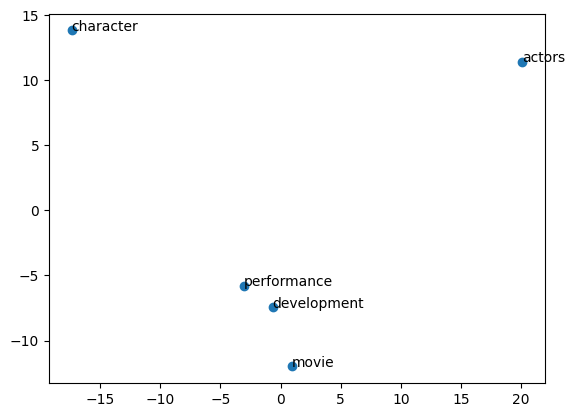

In [ ]:
# Write your code here


from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup

# IMDb URL for the film's reviews
url = "https://www.imdb.com/title/tt10640346/reviews?ref_=tt_urv"

def scrape_imdb_reviews(url, max_reviews=10000):
    reviews = []
    page = 1

    while len(reviews) < max_reviews:
        response = requests.get(url, params={"start": (page - 1) * 25})
        if response.status_code != 200:
            print(f"Failed to retrieve page {page}. Check your internet connection or the URL.")
            break

        soup = BeautifulSoup(response.content, "html.parser")
        review_elements = soup.find_all("div", class_="text")

        if not review_elements:
            print("No more reviews found.")
            break

        for review_element in review_elements:
            review_text = review_element.get_text(strip=True)
            reviews.append(review_text)

            if len(reviews) >= max_reviews:
                break

        page += 1

    return reviews

# Fetch reviews from IMDb
reviews = scrape_imdb_reviews(url)

# Preprocess the data (tokenization and cleaning)
def preprocess_text(text):
    # Remove non-alphanumeric characters and split into words
    words = re.findall(r'\b\w+\b', text.lower())
    return words

tokenized_reviews = [preprocess_text(review) for review in reviews]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)
model.save("word2vec_model_imdb.bin")

# Visualize Word Embeddings using PCA
def plot_word_embeddings(model, words):
    X = model.wv[words]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

# Visualize a subset of words (replace with words from your dataset)
words_to_visualize = ["movie", "character", "performance", "development", "actors"]
plot_word_embeddings(model, words_to_visualize)





# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [1]:
# The GitHub link of your final csv file

# Link:


https://github.com/rajidisindhuja/sindhuja_INFO5731_Fall2023/blob/main/reviews.csv


